In [1]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('sales_data_sample.csv',encoding='unicode_escape')

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [6]:
# Step 3: Data Preprocessing
# Selecting relevant numerical columns for clustering (for example, 'SALES', 'QUANTITYORDERED', etc.)
# You may select other numerical columns depending on your use case
features = df[['SALES', 'QUANTITYORDERED']].dropna()


In [7]:
# Step 4: Scale the data (K-Means is sensitive to scale)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [8]:
# Step 5: Use the Elbow Method to determine the optimal number of clusters
inertia = []  # Inertia (Sum of squared distances) for different numbers of clusters

In [9]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


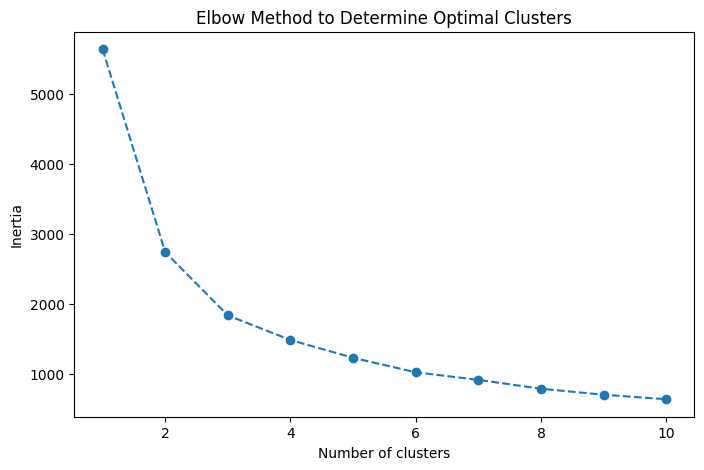

In [10]:
# Step 6: Plotting the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [17]:
# Step 7: Fitting KMeans with the optimal number of clusters (for example, 3)
optimal_clusters = 3  # Replace with the number you find using the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(scaled_features)


KMeans(n_clusters=3, random_state=0)

In [18]:
# Step 8: Adding the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

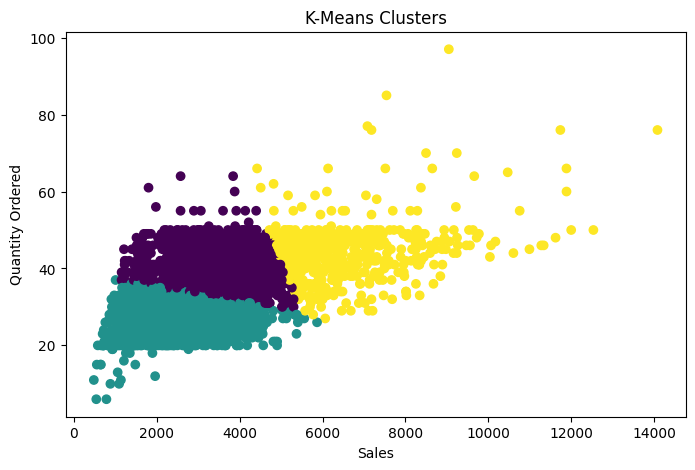

In [21]:
# Step 9: Visualizing the clusters (optional, only for 2D features like 'SALES' and 'QUANTITYORDERED')
plt.figure(figsize=(8, 5))
plt.scatter(features['SALES'], features['QUANTITYORDERED'], c=df['Cluster'])
plt.title('K-Means Clusters')
plt.xlabel('Sales')
plt.ylabel('Quantity Ordered')
plt.show()

Teal Cluster: Data points with lower sales (below 4000) and lower quantity ordered (mainly between 20 and 40).
Purple Cluster: Data points with moderate sales (around 4000–6000) and moderate quantity ordered (mainly between 40 and 60).
Yellow Cluster: Data points with higher sales (6000–14,000) and higher quantity ordered (ranging across the scale, but many around 50–70).
Insights:
Segmentation: The K-Means algorithm has segmented the dataset into three groups based on the similarity of SALES and QUANTITYORDERED values. The clusters group data points that are close together in terms of these two features.
Cluster Separation: There's some overlap between the clusters (especially between purple and yellow in the mid-range), but in general, the algorithm has separated the data based on differences in sales and quantities ordered.
Why is this useful?
This segmentation can be helpful for analyzing customer behavior. For example:
Teal: Customers with smaller orders in terms of sales and quantity.
Purple: Customers with moderate sales and ordered quantities.
Yellow: High-value customers making larger purchases in both sales and quantity.